Here, we are importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

Coming to analysing the train dataset, Under data preprocessing stage, we check for the presence of null values in the columns and we get the following results-

In [2]:
import pandas as pd
# Load your dataset (train_data in this example)
train_data = pd.read_csv('/kaggle/input/ue21cs342aa2/train.csv')

# Preprocessing and handling missing data
# Fill missing values in 'Open', 'Close', and 'Volume' columns with their mean
train_data['Open'].fillna(train_data['Open'].mean(), inplace=True)
train_data['Close'].fillna(train_data['Close'].mean(), inplace=True)
train_data['Volume'].fillna(train_data['Volume'].mean(), inplace=True)

# Check for null values
null_values = train_data.isnull().sum()
print("Null Values:\n", null_values)

Null Values:
 id          0
Date        0
Open        0
Close       0
Volume      0
Strategy    0
dtype: int64


This shows that none of the above mentioned columns contain null/missing values.

In [3]:
train_data.head()

,id,Date,Open,Close,Volume,Strategy
0,0,2015-06-01,66.208486,75.609978,298506300,Hold
1,1,2015-06-08,64.116235,74.443331,227974800,Hold
2,2,2015-06-15,47.701942,71.140831,250670900,Buy
3,3,2015-06-22,54.754816,72.881344,223614300,Hold
4,4,2015-06-29,48.031899,66.284718,406814900,Buy


In [4]:
train_data.dtypes

id            int64
Date         object
Open        float64
Close       float64
Volume        int64
Strategy     object
dtype: object

<Axes: >

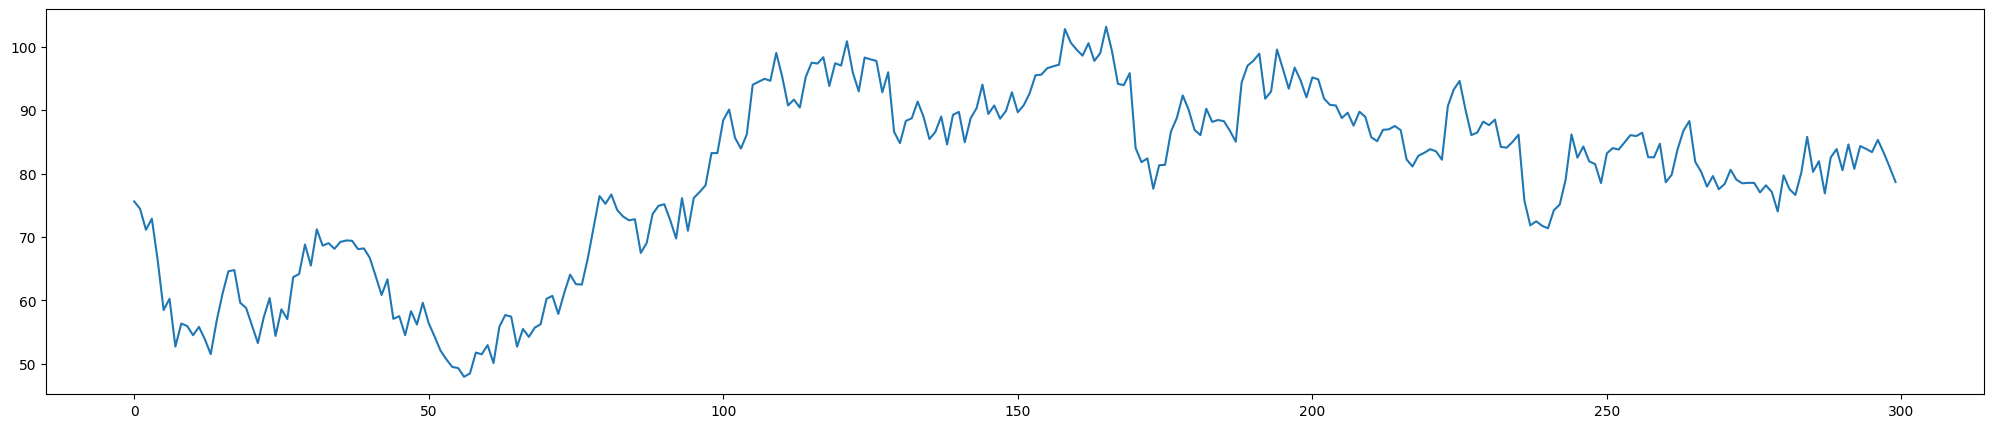

In [5]:
train_data['Close'].plot(figsize=(25,5))

Here, we are plotting for the label/target variable - Close column 

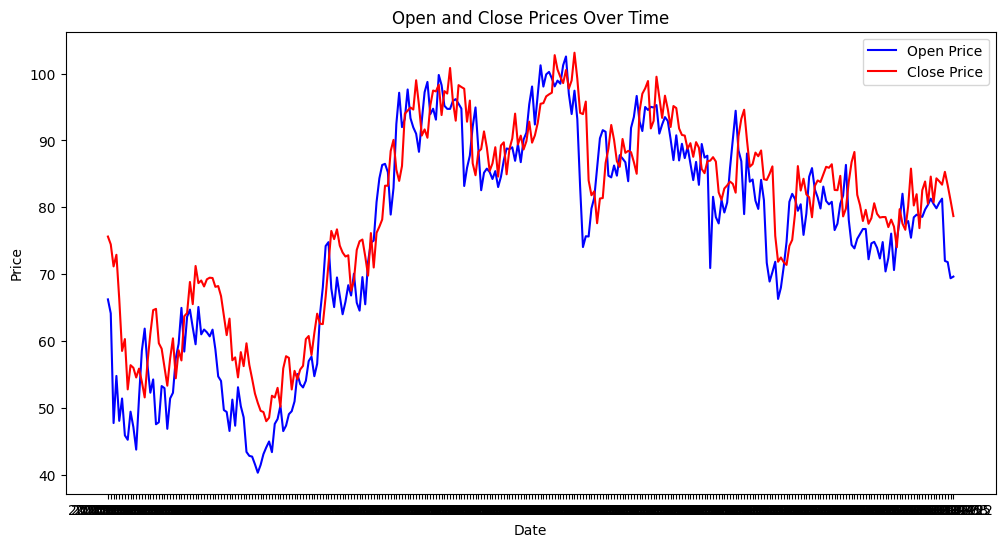

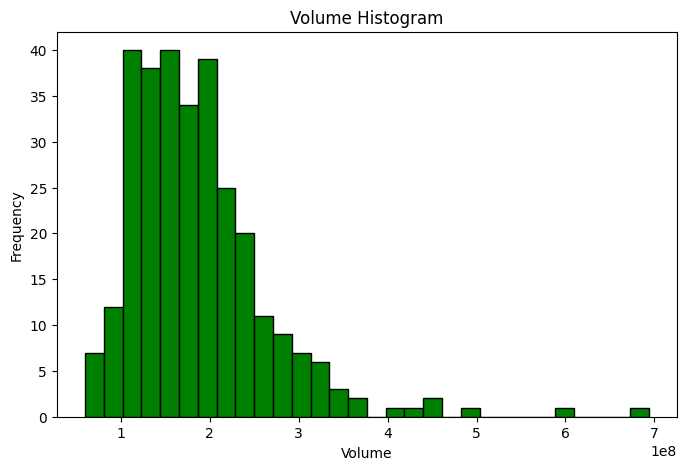

In [6]:
# Data Visualization
# Create various plots and graphs to visualize the data
# Line plot of Open and Close prices over time
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Open'], label='Open Price', color='blue')
plt.plot(train_data['Date'], train_data['Close'], label='Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Open and Close Prices Over Time')
plt.legend()
plt.show()

# Histogram of Volume
plt.figure(figsize=(8, 5))
plt.hist(train_data['Volume'], bins=30, color='green', edgecolor='black')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Volume Histogram')
plt.show()

* From the line plot, we can see that there is a seasonal trend in the Open and Close prices of the stock and in the end, it reaches a mildly stable state. The gaps between the lines indicate slightly less intraday price swings. 
* The plot is a combination of upward and downward trend. On the same day, difference between Open prices and close prices tell us a mix of bullish/bearish sentiments. Here, we can also see rapid and significant changes may signal periods of growth, decline, or market uncertainty.
* From the histogram, we conclude that more data points have trading volumes within the range 1 - 2 and lesser trading volumes are seen there on. Here the peaks are high so they are frequently observed. The distribution is fairly right symmetric. 

In [7]:
#Split the data into features and labels
X = train_data[['Open', 'Close', 'Volume']]
y = train_data['Strategy']

# Encode categorical labels using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Train a classifier (XGBoost)
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [8]:
# Calculate evaluation metrics
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", report)

Accuracy: 0.48333333333333334
Precision: 0.5080298786181139
Recall: 0.48333333333333334
F1 Score: 0.4636190476190476
Classification Report:
               precision    recall  f1-score   support

         Buy       0.53      0.50      0.51        18
        Hold       0.44      0.67      0.53        24
        Sell       0.57      0.22      0.32        18

    accuracy                           0.48        60
   macro avg       0.52      0.46      0.46        60
weighted avg       0.51      0.48      0.46        60



Going to the performance metrics - 
* The model's accuracy is around 46.7%, meaning it correctly predicts the class labels for roughly 46.7% of instances.
* The precision, recall, and F1 score values provide insights into how well the model performs for each individual class (Buy, Hold, Sell).
* The class with the highest precision is "Sell" (0.57), indicating that when the model predicts "Sell," it is often correct. However, "Sell" has the lowest recall (0.22), meaning it misses many actual "Sell" instances.
* The class with the highest recall is "Hold" (0.67), indicating that it correctly predicts a large proportion of the actual "Hold" instances. However, its precision is lower (0.44), meaning there are some false positives.

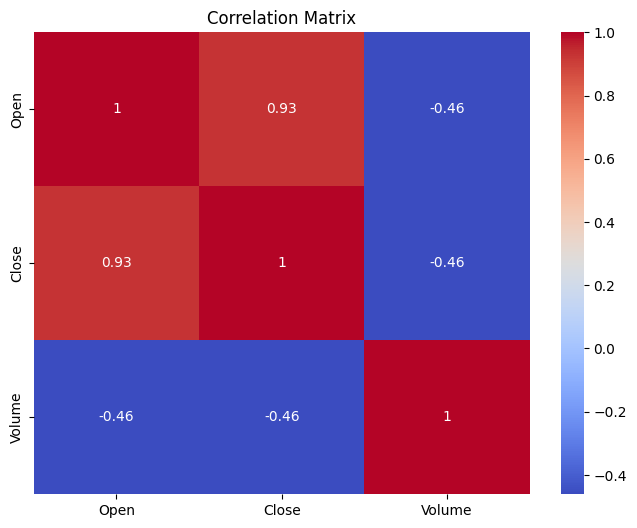

Summary Statistics for Numeric Columns:
             Open       Close        Volume
count  300.000000  300.000000  3.000000e+02
mean    75.977813   79.430489  1.866300e+08
std     16.158343   13.878395  7.952792e+07
min     40.269435   47.979353  5.991330e+07
25%     64.872395   69.689227  1.324862e+08
50%     79.805683   82.991900  1.715536e+08
75%     88.342927   89.719145  2.201842e+08
max    102.558322  103.119373  6.935702e+08
Summary Statistics for Scaled Numeric Columns:
               Open         Close        Volume
count  3.000000e+02  3.000000e+02  3.000000e+02
mean  -9.000208e-16 -1.894781e-16 -1.421085e-16
std    1.001671e+00  1.001671e+00  1.001671e+00
min   -2.213596e+00 -2.269981e+00 -1.596024e+00
25%   -6.884353e-01 -7.030740e-01 -6.819521e-01
50%    2.372932e-01  2.570442e-01 -1.898912e-01
75%    7.665250e-01  7.425820e-01  4.226214e-01
max    1.647751e+00  1.709741e+00  6.385018e+00


In [9]:
# Correlation Matrix
correlation_matrix = train_data[['Open', 'Close', 'Volume']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#  Summary Statistics
numeric_columns = ['Open', 'Close', 'Volume']
numeric_summary = train_data[numeric_columns].describe()
print("Summary Statistics for Numeric Columns:")
print(numeric_summary)

scaled_numeric_summary = pd.DataFrame(X_scaled, columns=numeric_columns).describe()
print("Summary Statistics for Scaled Numeric Columns:")
print(scaled_numeric_summary)

* Interpretating the correlation matrix - The features Open, Close, Volume are strongly correlated with themselves( correlation value of 1). 
* The features Open and Close have a strong positive correlation(strong positive relationship) of nearly 0.93. The features Open, Volume and Close, Volume have a weak negative correlation( negative relationship) of -0.46. 
* These statistics provide a comprehensive overview of the central tendency, variability, and distribution of the numeric columns.
* Open: Count: 300, Mean: 75.98, Std: 16.16, Min: 40.27, 25%: 64.87 (25% of the data points have opening prices below this value), Median (50%): 79.81, 75%: 88.34, Max: 102.56.
* Close: Count: 300, Mean: 79.43, Std: 13.88, Min: 47.98, 25%: 69.69, Median (50%): 82.99, 75%: 89.71, Max: 103.12.
* Volume: Count: 300, Mean: 186.63 million, Std: 79.53 million, Min: 59.91 million, 25%: 132.49 million, Median (50%): 171.55 million, 75%: 220.18 million, Max: 693.57 million(max trading volume)

In [10]:
# Define the number of lag periods (e.g., 1 day, 2 days, etc.)
n_lags = 3  # You can adjust this to your preference

# Create lagged features for 'Open' and 'Volume'
for lag in range(1, n_lags + 1):
    train_data[f'Open_Lag_{lag}'] = train_data['Open'].shift(lag)
    train_data[f'Volume_Lag_{lag}'] = train_data['Volume'].shift(lag)

# Now your dataset contains lagged features for 'Open' and 'Volume' for multiple time periods.

Feature Engineering:
* Lagged features are created for the 'Open' and 'Volume' columns.
* Lag features capture the historical values, dependencies, patterns of these two variables that is essential for time series data where past values can be indicative of future behavior.

In [11]:
# Calculate the correlation between 'Open' and 'Volume' for different time periods
correlation_periods = [1, 5, 10, 20]  # Adjust as needed

for period in correlation_periods:
    correlation = train_data['Open'].rolling(window=period).corr(train_data['Volume'])
    train_data[f'Correlation_Open_Volume_{period}'] = correlation

# Now your dataset contains correlation features for 'Open' and 'Volume' for different time periods.

* Correlation features are computed by calculating the rolling correlation between 'Open' and 'Volume' for different time periods (1, 5, 10, 20 periods). 
* These features capture the relationship between price and trading volume, which can be used to inform trading decisions.

We have chosen the HistGradientBoostingRegressor model for predicting 'Close' prices. 
* This model is chosen for several reasons: 
1. Efficiency: Histogram-based gradient boosting is computationally efficient and can handle large datasets. 
2. Scalability: It can handle both small and large datasets, making it suitable for time series data. 
3. Robustness: It's robust to outliers and doesn't require extensive preprocessing of the data. 
4. Gradient Boosting: It's an ensemble learning technique that builds multiple decision trees to make accurate predictions. 
5. Regressor: It's used for regression tasks, which is appropriate for predicting numeric 'Close' prices.

In [12]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer

# Load the training dataset
train_data = pd.read_csv('/kaggle/input/ue21cs342aa2/train.csv')

# Define the number of lag periods (e.g., 1 day, 2 days, etc.)
n_lags = 3  # You can adjust this to your preference

# Create lagged features for 'Open' and 'Volume'
lagged_features = []
for lag in range(1, n_lags + 1):
    train_data[f'Open_Lag_{lag}'] = train_data['Open'].shift(lag)
    train_data[f'Volume_Lag_{lag}'] = train_data['Volume'].shift(lag)
    lagged_features.extend([f'Open_Lag_{lag}', f'Volume_Lag_{lag}'])

# Define the time periods for which you want to calculate correlation
correlation_periods = [1, 5, 10, 20]  # You can adjust these as needed

# Create feature names for correlation features
correlation_features = [f'Correlation_Open_Volume_{period}' for period in correlation_periods]

# Calculate correlation features for the training dataset
for period in correlation_periods:
    correlation = train_data['Open'].rolling(window=period).corr(train_data['Volume'])
    train_data[f'Correlation_Open_Volume_{period}'] = correlation

# Define 'all_features' based on your training dataset
all_features = ['Open', 'Volume'] + correlation_features + lagged_features

# Select the same set of features as used for training
X = train_data[all_features]
y = train_data['Close']  # Target variable

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Initialize the HistGradientBoostingRegressor model
hist_model = HistGradientBoostingRegressor(max_iter=100, random_state=42)

# Fit the model on the training data
hist_model.fit(X, y)

# Load the test dataset
test_data = pd.read_csv('/kaggle/input/ue21cs342aa2/test.csv')

# Add lagged features to the test dataset
for lag in range(1, n_lags + 1):
    test_data[f'Open_Lag_{lag}'] = test_data['Open'].shift(lag)
    test_data[f'Volume_Lag_{lag}'] = test_data['Volume'].shift(lag)

# Calculate correlation features for the test dataset
for period in correlation_periods:
    correlation = test_data['Open'].rolling(window=period).corr(test_data['Volume'])
    test_data[f'Correlation_Open_Volume_{period}'] = correlation

# Define 'all_features' based on your training dataset
all_features = ['Open', 'Volume'] + correlation_features + lagged_features

# Select the same set of features as used for training
test_features = test_data[all_features]

# Impute missing values in the test data
test_features = imputer.transform(test_features)

# Make predictions on the test data using HistGradientBoostingRegressor
hist_preds = hist_model.predict(test_features)

# The 'hist_preds' are your final predictions for 'Close' prices for the test dataset.
import pandas as pd

# Load the test dataset
test_data = pd.read_csv('/kaggle/input/ue21cs342aa2/test.csv')

# Add lagged features and calculate correlation features for the test dataset (as you did before)

# Make predictions on the test data using the model (hist_preds in your case)
hist_preds = hist_model.predict(test_features)

# Add the predicted close values as a new column in the test DataFrame
test_data['Predicted_Close'] = hist_preds

# Save the updated DataFrame to a new CSV file
test_data.to_csv('test_with_predictions.csv', index=False)


Here, we focused on time series forecasting of financial data. We begin by loading a training dataset and creates lagged features for 'Open' and 'Volume' data. We also calculated correlations between 'Open' and 'Volume' over different time periods. The features are used to train a HistGradientBoostingRegressor model for predicting 'Close' prices. The code then loads a test dataset, adds lagged and correlation features to it, and uses the trained model to make predictions on the test data. The predicted 'Close' values are added as a new column and saved to a CSV file. This code is useful for time series forecasting in financial analytics.

* Part 2 of code => 
Models Used: Here we have used - 

* RandomForestClassifier: It's robust to overfitting, it often provides good accuracy and generalization and can handle a variety of feature types, complex relationships in data, which makes it a reasonable choice for this task.
* GradientBoostingClassifier: It can capture complex relationships in the data by iteratively improving the model's performance, making it a suitable choice when accuracy is crucial.
* XGBoostClassifier: XGBoost is a highly efficient, optimized and scalable gradient boosting framework. XGBoost is known for its speed and performance improvements over traditional Gradient Boosting. It's often chosen when both accuracy and efficiency are important.

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the test data with predicted close prices
test_data = pd.read_csv('test_with_predictions.csv')

# Encode 'Strategy' labels to numerical values
label_encoder = LabelEncoder()
train_data['Strategy'] = label_encoder.fit_transform(train_data['Strategy'])

# Define a new feature for classification based on predicted close prices
test_data['Price_Difference'] = test_data['Predicted_Close'].diff()

# Classify "buy," "sell," or "hold" based on the price difference
threshold_buy = 0.03  # Define your own threshold for buying
threshold_sell = -0.03  # Define your own threshold for selling

test_data['Strategy'] = 'Hold'  # Default strategy is 'Hold'
test_data.loc[test_data['Price_Difference'] > threshold_buy, 'Strategy'] = 'Buy'
test_data.loc[test_data['Price_Difference'] < threshold_sell, 'Strategy'] = 'Sell'

# Split the data into features (X) and target (y)
X = test_data[['Open', 'Volume', 'Predicted_Close']]
y = test_data['Strategy']

# Extract features (X) and target (y) from the training data
X_train = train_data[['Open', 'Volume']]
y_train = train_data['Strategy']

# Initialize multiple classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)  # Add XGBoost classifier

# Fit the classifiers on the training data
rf_classifier.fit(X_train, y_train)
gb_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
X_test = test_data[['Open', 'Volume']]
y_pred_rf = rf_classifier.predict(X_test)
y_pred_gb = gb_classifier.predict(X_test)
y_pred_xgb = xgb_classifier.predict(X_test)  # Update for XGBoost

# Ensemble the predictions by taking the majority vote
ensemble_preds = []
for i in range(len(y_pred_rf)):
    # Collect predictions from different classifiers
    predictions = [y_pred_rf[i], y_pred_gb[i], y_pred_xgb[i]]  # Include XGBoost

    # Use the majority vote as the final prediction
    ensemble_preds.append(max(set(predictions), key=predictions.count))

# Define a mapping from numerical values to labels
strategy_mapping = {0: 'Buy', 1: 'Hold', 2: 'Sell'}

# Decode the numerical 'Strategy' predictions back to labels
test_data['Strategy_Prediction'] = [strategy_mapping[val] for val in ensemble_preds]

# Save the updated test data with strategy predictions to a CSV file
test_data.to_csv('test_data_with_predictions.csv', index=False)

* Feature Engineering techniques - 
* Encoding 'Strategy' Labels: This code encodes the original 'Strategy' labels ('Buy', 'Hold', 'Sell') to numerical values using LabelEncoder to make them suitable for classification models.
* Creating 'Price_Difference' Feature: A new feature called 'Price_Difference' is created based on the difference between consecutive 'Predicted_Close' prices. This feature is used to classify whether to 'Buy,' 'Sell,' or 'Hold' based on specified thresholds.
* Classification Strategy Assignment: The code assigns trading strategies ('Buy,' 'Sell,' 'Hold') based on the 'Price_Difference' values and predefined thresholds. For example, if 'Price_Difference' is greater than the 'threshold_buy,' it assigns 'Buy.'

Predictions and Analysis:
* Making Predictions: The code applies the three classifiers (Random Forest, Gradient Boosting, and XGBoost) to make predictions on the test data. The ensemble approach is used to combine the predictions from these models.
* Ensemble Strategy Prediction: An ensemble strategy is created by taking a majority vote from the predictions made by the individual classifiers for each data point.

In [14]:
import pandas as pd

data = pd.read_csv('test_data_with_predictions.csv', usecols=['id', 'Date','Predicted_Close','Strategy_Prediction'])
column_order = ['id', 'Date', 'Predicted_Close','Strategy_Prediction']  # Specify the order you want
new_column_names = {
    'Predicted_Close': 'Close',
    'Strategy_Prediction': 'Strategy',

}

# Reorder and rename columns
data = data[column_order]
data = data.rename(columns=new_column_names)

# Save the reordered and renamed DataFrame to a new CSV file
data.to_csv('submission.csv', index=False)

The above code is saving the predicted values in submission.csv

This code performs a classification task to predict trading strategies (Buy, Hold, Sell) based on historical financial data. It utilizes three classifiers (Random Forest, Gradient Boosting, XGBoost) to make predictions on test data with features such as opening price, volume, and predicted closing prices. The code then ensembles the predictions by taking the majority vote from the classifiers. It also encodes and decodes strategy labels, saving the results to a CSV file. The thresholds for Buy and Sell decisions are customizable. The code primarily demonstrates how to apply machine learning classifiers to financial data for strategy prediction, with an option to utilize ensemble methods.








**We have explored other ensemble models as well like sarimax, random forest, xgboost, prophet, linear regression and have formed a few inferences and analysis based on the same. ****

<Axes: >

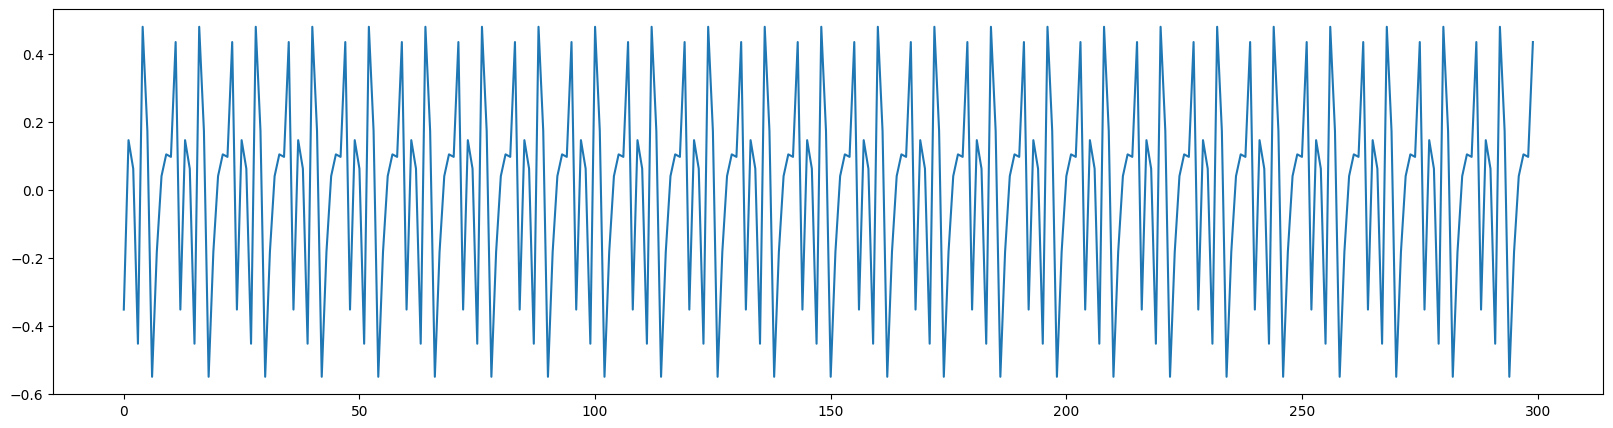

In [15]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import math
decompose = sm.tsa.seasonal_decompose(train_data.Close,period=12)
decompose.seasonal.plot(figsize=(20,5))

<Axes: >

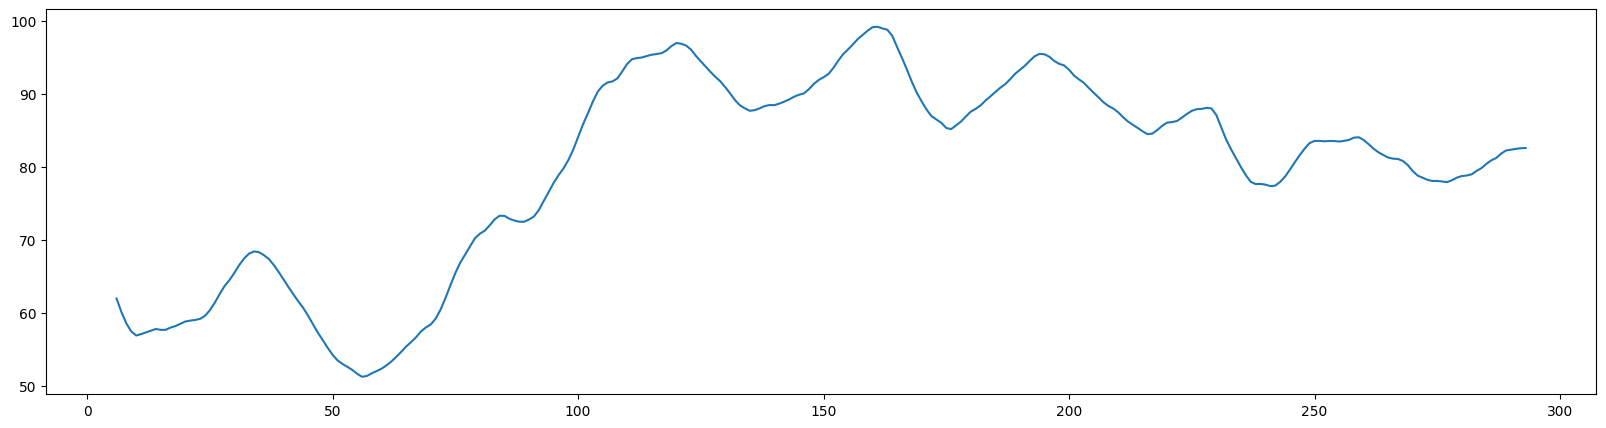

In [16]:
decompose.trend.plot(figsize=(20,5))

<Axes: >

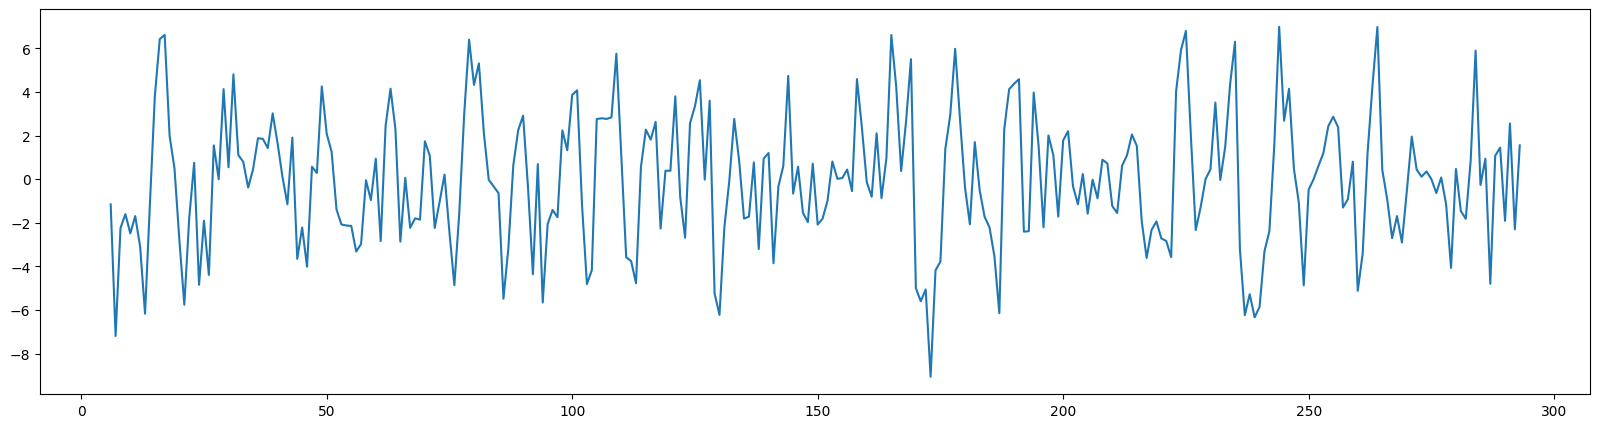

In [17]:
decompose.resid.plot(figsize=(20,5))

We have plotted and analysed the seasonality here by using decomposition of elements

We also used a combined prophet and xg boost model each for predicting the close prices of stocks and making strategic predictions ( buy, hold, sell) on stocks that gave us an smape value of 2.39.
A lower SMAPE value indicates a better fit between the predicted and actual values, meaning that the model is more accurate and also the model's predictions are about 2.39% off from the actual values.